# Task 1: Análisis exploratorio de los datos

In [2]:
import os
from pathlib import Path

# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)

# Preprocesado y modelado
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [3]:
DATA_RAW = Path("../data")

In [4]:
def file_df(path, filename, sep):
        """Method to load files with the correct separator

        Args:
            path ([str]): path to the raw data files
            filename ([str]): name of the txt file to be opened

        Returns:
            [Dataframe]: dataframe created from the file
        """
        return pd.read_csv(Path(path) / filename, sep)

In [5]:
df_train = file_df(DATA_RAW,'j0004_train.csv',',') 
df_test = file_df(DATA_RAW,'j0004_X_test.csv',',') 

In [6]:
# Comprobamos el tipo de datos
df_train.dtypes

feature1    float64
feature2    float64
feature3    float64
feature4    float64
feature5    float64
feature6    float64
feature7    float64
target        int64
dtype: object

In [7]:
# Número totoal de filas y columnas
print("shape train dataset: ", df_train.shape)

# Duplicados
duplicate_rows_df = df_train[df_train.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)


shape train dataset:  (2100, 8)
number of duplicate rows:  (0, 8)


In [8]:
# Valores nulos
print(df_train.isnull().sum())

feature1    0
feature2    0
feature3    0
feature4    0
feature5    0
feature6    0
feature7    0
target      0
dtype: int64


<AxesSubplot:>

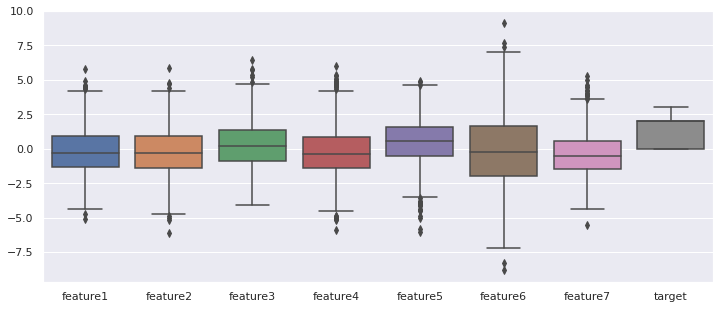

In [9]:
# Boxplot + target
plt.figure(figsize=(12,5))
sns.boxplot(data=df_train)

<AxesSubplot:>

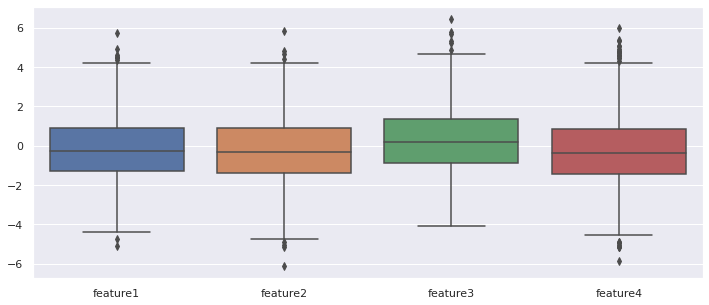

In [10]:
# Boxplot sin target
plt.figure(figsize=(12,5))
sns.boxplot(data=df_train.iloc[:, 0:4])

In [11]:
# Cuantiles
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

feature1    2.210069
feature2    2.294824
feature3    2.229147
feature4    2.275063
feature5    2.056607
feature6    3.653508
feature7    2.046836
target      2.000000
dtype: float64


In [12]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = df_train.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)



,variable_1,variable_2,r,abs_r
43,feature6,feature4,-0.751262,0.751262
29,feature4,feature6,-0.751262,0.751262
14,feature2,feature7,0.677226,0.677226
49,feature7,feature2,0.677226,0.677226
42,feature6,feature3,0.560616,0.560616
21,feature3,feature6,0.560616,0.560616
38,feature5,feature7,-0.521746,0.521746
52,feature7,feature5,-0.521746,0.521746
37,feature5,feature6,-0.420770,0.420770
44,feature6,feature5,-0.420770,0.420770


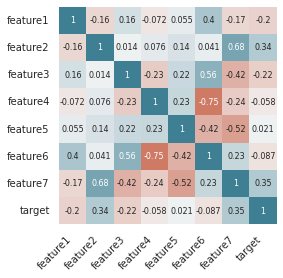

In [13]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

In [14]:
# Correlaciones
df_num_corr = df_train.corr()['target'][:-1] 
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with target:\n{}".format(len(golden_features_list), golden_features_list))

There is 0 strongly correlated values with target:
Series([], Name: target, dtype: float64)


# Task 2:  Predecir los valores target con un modelo basado regresión lineal.

In [19]:
# Separamos las variables del target
X = df_train.iloc[:,0:7]
y = df_train['target']

In [20]:
# Ejecutamos el modelo
linreg = LinearRegression()
linreg.fit(X,y)

LinearRegression()

In [21]:
y_pred = linreg.predict(df_test)
np.savetxt("../resultados/results.csv", y_pred, delimiter=",")

FileNotFoundError: [Errno 2] No such file or directory: '../resultados/results.csv'